# Percentiles script
Script to generate rainfall percentiles for ACS GWLs

Chore list:
- decouple plot / write functions
- add BC source into percentile plot title
- stippling for multi-model mean > inter-model sd

In [1]:
import os
os.chdir('/g/data/mn51/users/jb6465/acs-drought/percentiles_spi_spei_smi')
import dictionaries
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from core_functions import mask_ocean, calculate_spi, load_target_variable
from plot_write_functions import plot_write_percentile_threshold, plot_comparison_box_whisker, plot_comparison_heatmap

### DASK setup

In [8]:
import dask
import tempfile
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

dask.config.set({
    'array.chunk-size': "256 MiB",
    'array.slicing.split_large_chunks': True, #This can make AXIOM very slow
    'distributed.comm.timeouts.connect': '120s',
    'distributed.comm.timeouts.tcp': '120s',
    'distributed.comm.retry.count': 10,
    'distributed.scheduler.allowed-failures': 20,
    "distributed.scheduler.worker-saturation": 1.1, #This should use the new behaviour which helps with memory pile up
})

# client = dask.distributed.Client()
client = Client(n_workers=10, threads_per_worker=1, local_directory = tempfile.mkdtemp(), memory_limit = "63000mb")
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 10
Total threads: 10,Total memory: 586.73 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33363,Workers: 10
Dashboard: /proxy/8787/status,Total threads: 10
Started: Just now,Total memory: 586.73 GiB
Comm: tcp://127.0.0.1:43439,Total threads: 1
Dashboard: /proxy/36923/status,Memory: 58.67 GiB
Nanny: tcp://127.0.0.1:40575,


In [7]:
# client.close()

### Load rainfall

In [3]:
BC_SWITCH = False
BC_METHOD = 'QME'
BC_SOURCE = 'AGCD' #AGCD BARRA-R2

In [4]:
rain = load_target_variable('var_p', 3, ['recent', 'GWL1.2-ssp370', 'GWL1.5-ssp370', 'GWL2.0-ssp370', 'GWL3.0-ssp370'],\
                            bc=BC_SWITCH, bc_method=BC_METHOD, bc_source=BC_SOURCE)

---> BC SWITCH OFF: USING DATA FROM py18 AND hq89

---> LOADING RECENT PERIOD
- AGCD
- BARPA-R-CMCC-ESM2 (r1i1p1f1)
- BARPA-R-ACCESS-ESM1-5 (r6i1p1f1)
- BARPA-R-ACCESS-CM2 (r4i1p1f1)
- BARPA-R-EC-Earth3 (r1i1p1f1)
- BARPA-R-CESM2 (r11i1p1f1)
- BARPA-R-MPI-ESM1-2-HR (r1i1p1f1)
- BARPA-R-NorESM2-MM (r1i1p1f1)
- CCAM-v2203-SN-CMCC-ESM2 (r1i1p1f1)
- CCAM-v2203-SN-ACCESS-ESM1-5 (r6i1p1f1)
- CCAM-v2203-SN-ACCESS-CM2 (r4i1p1f1)
- CCAM-v2203-SN-EC-Earth3 (r1i1p1f1)
- CCAM-v2203-SN-CESM2 (r11i1p1f1)
- CCAM-v2203-SN-CNRM-ESM2-1 (r1i1p1f2)

---> LOADING GWL1.2-SSP370 PERIOD
- BARPA-R-CMCC-ESM2 (r1i1p1f1)
- BARPA-R-ACCESS-ESM1-5 (r6i1p1f1)
- BARPA-R-ACCESS-CM2 (r4i1p1f1)
- BARPA-R-EC-Earth3 (r1i1p1f1)
- BARPA-R-CESM2 (r11i1p1f1)
- BARPA-R-MPI-ESM1-2-HR (r1i1p1f1)
- BARPA-R-NorESM2-MM (r1i1p1f1)
- CCAM-v2203-SN-CMCC-ESM2 (r1i1p1f1)
- CCAM-v2203-SN-ACCESS-ESM1-5 (r6i1p1f1)
- CCAM-v2203-SN-ACCESS-CM2 (r4i1p1f1)
- CCAM-v2203-SN-EC-Earth3 (r1i1p1f1)
- CCAM-v2203-SN-CESM2 (r11i1p1f1)
- CCAM-v2203-SN-CNR

### Percentile threshold analysis

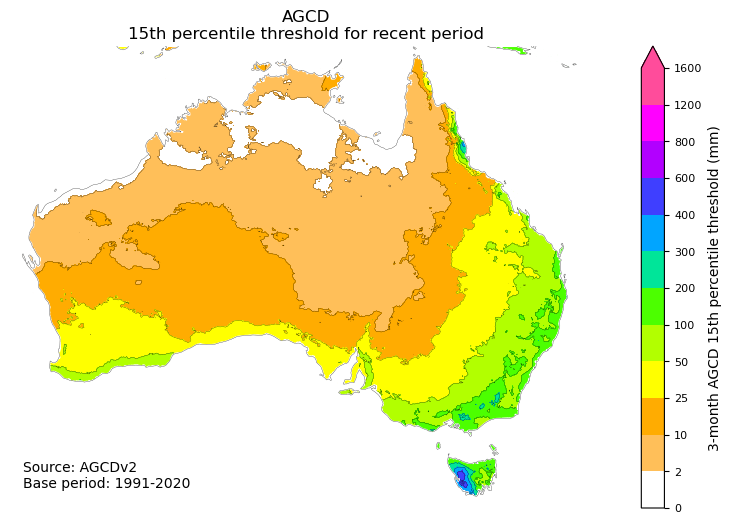

<Figure size 640x480 with 0 Axes>

In [5]:
plot_write_percentile_threshold('AGCD', 'recent', rain['recent']['AGCD'], 15, 3, bias_correction=False, write_netcdf=False)

In [9]:
# for RCM in ['BARPA-R', 'CCAM-v2203-SN']:
#     plot_write_percentile_threshold(RCM, 'recent', rain, 15, 3, bias_correction='BC_%s_%s' % (BC_METHOD, BC_SOURCE), write_netcdf=False)
#     plot_write_percentile_threshold(RCM, 'GWL1.2-ssp370', rain, 15, 3, bias_correction='BC_%s_%s' % (BC_METHOD, BC_SOURCE), write_netcdf=False)
#     plot_write_percentile_threshold(RCM, 'GWL1.5-ssp370', rain, 15, 3, bias_correction='BC_%s_%s' % (BC_METHOD, BC_SOURCE), write_netcdf=False)
#     plot_write_percentile_threshold(RCM, 'GWL2.0-ssp370', rain, 15, 3, bias_correction='BC_%s_%s' % (BC_METHOD, BC_SOURCE), write_netcdf=False)
#     plot_write_percentile_threshold(RCM, 'GWL3.0-ssp370', rain, 15, 3, bias_correction='BC_%s_%s' % (BC_METHOD, BC_SOURCE), write_netcdf=False)

### NCRA regions change in rainfall analysis

Aggregating rain to NCRA regions (using raw outputs from BARPA-R):
---> NSW_&_ACT
---> NT
---> QLD_North
---> QLD_South
---> SA
---> TAS
---> VIC
---> WA_North
---> WA_South


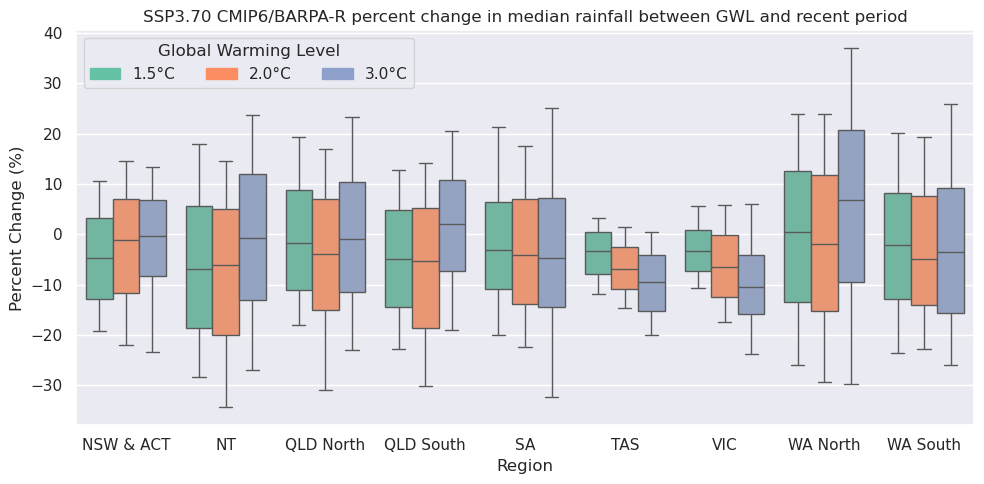

/g/data/mn51/users/jb6465/acs-drought/percentiles_spi_spei_smi/plot_write_functions.py:128: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  plot_df[model][NCRA_region]=100*(GWL_median-recent_median)/recent_median
/g/data/mn51/users/jb6465/acs-

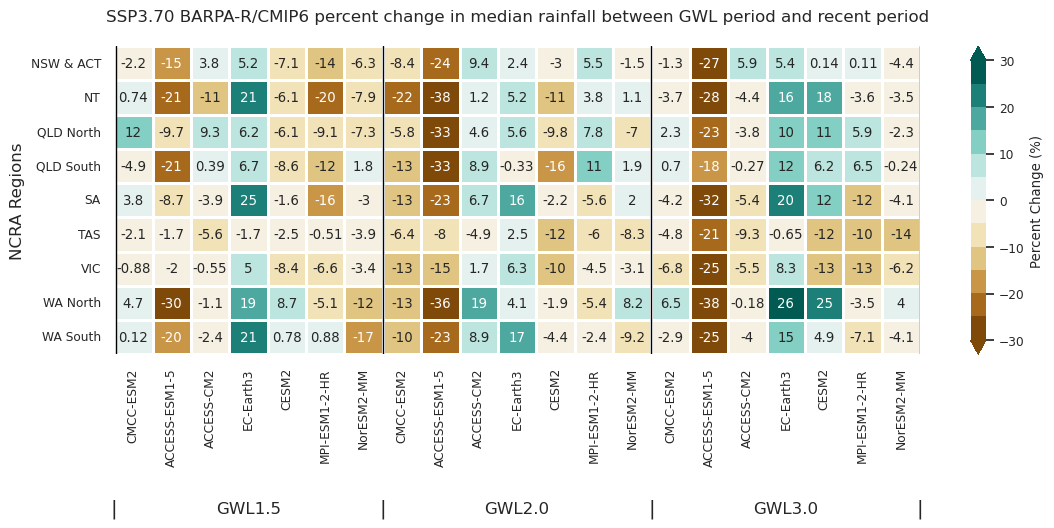

<Figure size 640x480 with 0 Axes>

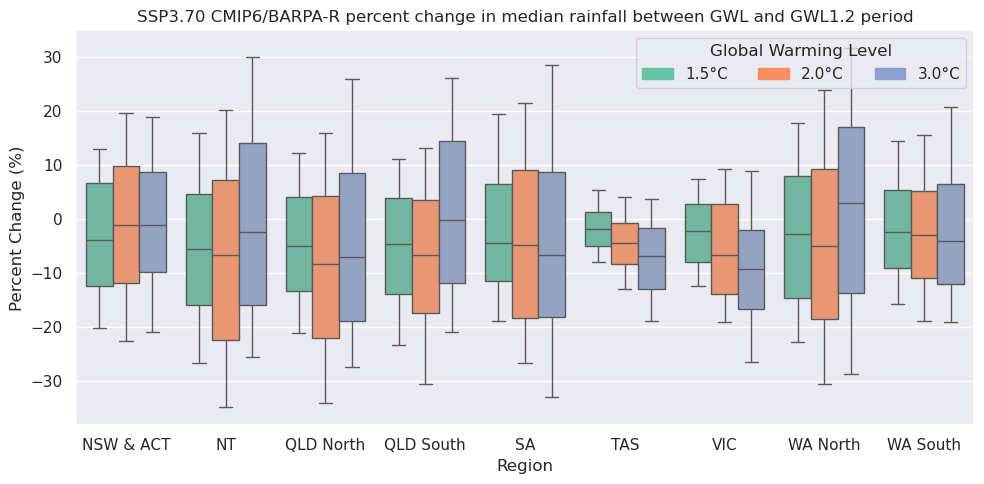

/g/data/mn51/users/jb6465/acs-drought/percentiles_spi_spei_smi/plot_write_functions.py:128: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  plot_df[model][NCRA_region]=100*(GWL_median-recent_median)/recent_median
/g/data/mn51/users/jb6465/acs-

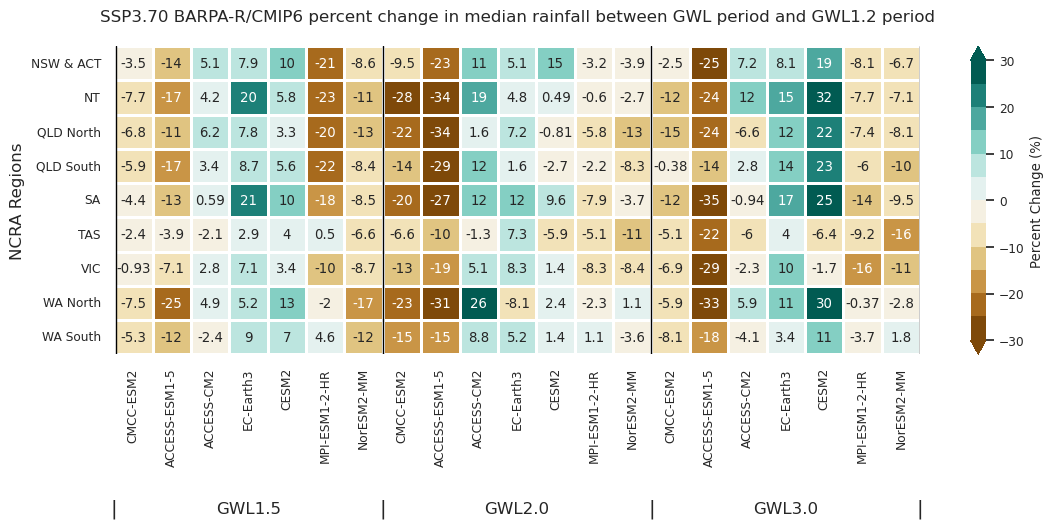

Aggregating rain to NCRA regions (using raw outputs from CCAM-v2203-SN):
---> NSW_&_ACT


In [ ]:
import rioxarray as rio
import geopandas
from shapely.geometry import mapping
import pandas as pd
import logging

# ignore garbage collection warnings and NaN slice warnings
logging.getLogger("distributed.utils_perf").setLevel(logging.ERROR)

for RCM in ['BARPA-R', 'CCAM-v2203-SN']:
    NCRA_dict={}
    print('Aggregating rain to NCRA regions (using %s outputs from %s):' % ('raw' if BC_SWITCH==False else 'bias-corrected', RCM))
    for NCRA_region in ['NSW_&_ACT', 'NT', 'QLD_North', 'QLD_South', 'SA', 'TAS', 'VIC', 'WA_North', 'WA_South']: 
        NCRA_dict[NCRA_region]={}
        print('---> %s' % (NCRA_region))
        for period in ['recent', 'GWL1.2-ssp370', 'GWL1.5-ssp370', 'GWL2.0-ssp370', 'GWL3.0-ssp370']:
            NCRA_dict[NCRA_region][period]={}
            for model in rain['GWL1.5-ssp370'][RCM].keys():
                if period!='recent' and model=='AGCD':
                    continue
                if BC_SWITCH == False:
                    rain[period][RCM][model] = rain[period][RCM][model].compute() 
                #use rasterio, geopandas and shapely to aggregate rain to NCRA region
                rain[period][RCM][model].rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
                rain[period][RCM][model].rio.write_crs("EPSG:4283", inplace=True)
                geodf = geopandas.read_file("NCRA_shapefiles/%s.shp" % (NCRA_region),  crs="EPSG:4383")
                NCRA_dict[NCRA_region][period][model] = rain[period][RCM][model].rio.clip(geodf.geometry.apply(mapping), geodf.crs)
    
    for comparison_period in ['recent', 'GWL1.2-ssp370']:
        plot_comparison_box_whisker(comparison_period, rain, RCM, NCRA_dict)
        plot_comparison_heatmap(comparison_period, rain, RCM, NCRA_dict)
    
    del NCRA_dict

### IFD analysis (Intensity, Frequency, Duration)
- very slow at the moment
- need to experiment when to call .compute()

In [7]:
def compute_ifd_metrics(input_binary_event_array):
    """
    Function to compute average drought duration, frequency and intensity.

    Parameters:
    - input_binary_event_array (3D xarray: binary where 1 = event (i.e. rainfall below p15 threshold) and 0 = no event)
    Returns:
    metric xarray with
    - duration (average drought duration at each gridcell)
    - frequency (average drought frequency at each gridcell)
    - intensity (average drought intensity at each gridcell)
    """
    segments_unmasked = np.ma.clump_unmasked(np.ma.masked_invalid(input_binary_event_array))
    events = [segment for segment in segments_unmasked if segment.stop - segment.start > 1]
    duration = np.ma.average([(event.stop - event.start) for event in events])
    frequency = len(events) / (input_binary_event_array.shape[0] / 12)
    intensity = np.ma.average([np.ma.average(input_binary_event_array[event.start:event.stop]) for event in events])

    metrics = np.array([intensity, frequency, duration])
    
    return metrics

In [ ]:
intensity = {}
frequency = {}
duration = {}

print('Processing CMIP6 drought duration, frequency, intensity metrics for period:')
for period in ['recent', 'current', 'GWL1.5-ssp370', 'GWL2.0-ssp370', 'GWL3.0-ssp370']:
    print('---> %s' % (period))
    duration[period] = {}
    frequency[period] = {}
    intensity[period] = {}
    for model in ['CMCC-ESM2', 'ACCESS-ESM1-5', 'ACCESS-CM2', 'EC-Earth3', 'CESM2', 'MPI-ESM1-2-HR', 'NorESM2-MM']:
        print('     · %s' % (model))
        #apply dfi_metric function using xarray/dask capability
        dfi_metric = xr.apply_ufunc(
                    compute_ifd_metrics,
                    binary_cmip6_event_arrays[period][model].chunk({'time': 'auto'}),
                    input_core_dims=[['time']],
                    output_core_dims=[['metric']], 
                    vectorize=True,
                    dask='parallelized',
                    output_dtypes=[float],  
                    dask_gufunc_kwargs={'output_sizes': {'metric': 3}, 'allow_rechunk': True}
                    ) 
        
        int = dfi_metric.sel(metric=0)
        freq = dfi_metric.sel(metric=1)
        dur = dfi_metric.sel(metric=2)

        #call .compute() now so that IFD grids are called to memory
        intensity[period][model] = int.compute()
        frequency[period][model] = freq.compute()
        duration[period][model] = dur.compute()


Processing CMIP6 drought duration, frequency, intensity metrics for period:
---> recent
     · CMCC-ESM2


In [8]:
recent_duration = xr.concat(list(duration['recent'].values()), dim='models').mean(dim='models')
current_duration = xr.concat(list(duration['current'].values()), dim='models').mean(dim='models')
GWL15_duration = xr.concat(list(duration['GWL1.5-ssp370'].values()), dim='models').mean(dim='models')
GWL20_duration = xr.concat(list(duration['GWL2.0-ssp370'].values()), dim='models').mean(dim='models')
GWL30_duration = xr.concat(list(duration['GWL3.0-ssp370'].values()), dim='models').mean(dim='models')


In [ ]:
recent_duration.to_netcdf('duration_recent.nc')